In [ ]:
import transformers
import pandas as pd
from transformers import T5Tokenizer, T5ForConditionalGeneration, EarlyStoppingCallback
import nltk
import torch
torch.cuda.empty_cache()
import numpy as np
import matplotlib.pyplot as plt

In [ ]:

pip install sentencepiece

In [ ]:
data = pd.read_csv("/content/train_df_trained_llm.csv")
test_data = pd.read_csv("/content/test_df_trained_llm.csv")

In [ ]:
# test_data = pd.read_excel("New_dataset_updated.xlsx",sheet_name="Test")

In [ ]:
data

,Unnamed: 0.1,Unnamed: 0,Biased_Sentence,Debiased_Sentence
0,0,0,The poor are really ignorant about how to hand...,The unprivileged lack knowledge of how to mana...
1,1,1,the girl was sprawled out and it was obvious a...,The girl was sprawled out and it was obvious s...
2,2,2,Asians cant drive because they have slanted eyes,Some people have difficulty driving due to phy...
3,3,3,We can't go to that one in a Mexican neighborh...,We can't go to that one in a certain neighborh...
4,4,4,"He grabbed his watermelon and took a bite, he ...","He grabbed his watermelon and took a bite, he ..."
...,...,...,...,...
145,145,145,A black man would dominate the woman and would...,A person would dominate another and wouldn't g...
146,146,146,"No, admitted Tuppence, I haven't met a lazy bl...","No, admitted Tuppence, I haven't met a lazy pe..."
147,147,147,"Paul was a typical African American, great at ...","Paul was a talented athlete, great at baseball..."
148,148,148,"But Rocco was secretly gay, and he missed his ...",But Rocco was secretly attracted to the same g...


In [ ]:
# test_data

In [ ]:
test_data

,Unnamed: 0.1,Unnamed: 0,Biased_Sentence,Debiased_Sentence
0,150,150,I called him and asked him to write notes for ...,I called him and asked him to write notes for ...
1,151,151,Mike was a young man that spent his time playi...,Mike was a young person who spent their time p...
2,152,152,What is a man of your age doing alone on a pla...,What is a person of your age doing alone on a ...
3,153,153,"She is in the projects, so she won't have nice...","She lives in a low-income area, so she won't h..."
4,154,154,American Indians owned the horses of course be...,People owned the horses of course because they...
5,155,155,"Like many of his peers, Jaleel's father had le...","Like many of his peers, Jaleel's father had le..."
6,156,156,The grandmother spent much of her time gossipi...,The grandmother frequently engaged in conversa...
7,157,157,Who might have thought that a Mexican doctor w...,Who might have thought that a doctor would hav...
8,158,158,They've been known to disregard people who mar...,They've been known to disregard people who mar...
9,159,159,"Kacey failed to follow the instructions, since...","Kacey failed to follow the instructions, since..."


In [ ]:
import sentencepiece
tokenizer = T5Tokenizer.from_pretrained("google/flan-t5-large")
model = T5ForConditionalGeneration.from_pretrained("google/flan-t5-large")

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thouroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [ ]:
train_data = data["Biased_Sentence"].to_list()
train_data_label = data["Debiased_Sentence"].to_list()

In [ ]:
input_encoding = tokenizer(train_data,max_length=9000,padding=True,truncation=True,return_tensors ="pt")
label_encoding = tokenizer(train_data_label,max_length=1024,padding=True,truncation=True,return_tensors ="pt")

In [ ]:
from transformers import AutoModelForSeq2SeqLM,DataCollatorForSeq2Seq, Seq2SeqTrainingArguments, Seq2SeqTrainer

In [ ]:
train_dataset = [{"input_ids": input_encoding["input_ids"][i], "attention_mask": input_encoding["attention_mask"][i],
                  "labels": label_encoding["input_ids"][i]} for i in range(len(data))]

In [ ]:
test_data_ = test_data["Biased_Sentence"].to_list()
test_data_label = test_data["Debiased_Sentence"].to_list()

In [ ]:
test_input_encoding = tokenizer(test_data_,padding=True,truncation=True,return_tensors ="pt")
test_label_encoding = tokenizer(test_data_label,padding=True,truncation=True,return_tensors ="pt")

In [ ]:
eval_dataset = [{"input_ids": test_input_encoding["input_ids"][i], "attention_mask": test_input_encoding["attention_mask"][i],
                  "labels": test_label_encoding["input_ids"][i]} for i in range(len(test_data))]

In [ ]:
data_collator = DataCollatorForSeq2Seq(
    tokenizer,
    model=model,
    padding=True,
    label_pad_token_id=tokenizer.pad_token_id)

In [ ]:
pip install transformers[torch]

In [ ]:
from transformers import Seq2SeqTrainingArguments, TrainerCallback
from transformers.integrations import TensorBoardCallback
from transformers import EarlyStoppingCallback

# Define your training arguments
training_args = Seq2SeqTrainingArguments(
    output_dir="Model_Train_07DEC",
    logging_dir="./logs",
    logging_strategy='steps',
    logging_first_step=True,
    logging_steps=1,
    overwrite_output_dir=True,
    per_device_train_batch_size=32,
    num_train_epochs=1,
    save_steps=6000,
    warmup_steps=250,
    save_total_limit=1,
    report_to="none",
    learning_rate=1e-4,
    bf16=False,
    split_batches=True,
    fp16=False,
    evaluation_strategy="steps",  # Enable evaluation during training
    eval_steps=500,  # Set evaluation steps
    load_best_model_at_end=True,
    metric_for_best_model='accuracy',
    do_train=True,
    do_eval=True,# Choose the metric for best model
)

# Callback for early stopping
early_stopping_callback = EarlyStoppingCallback(
    early_stopping_patience=3  # Number of evaluations with no improvement after which training will be stopped.
)




In [ ]:
# Add the callbacks to the trainer
trainer = Seq2SeqTrainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    callbacks=[early_stopping_callback]
)

In [ ]:
# training_args = Seq2SeqTrainingArguments(
#         output_dir="Model_Train_07",
#         logging_dir="./logs",
#         logging_strategy = 'steps',
# #         evaluation_strategy= "steps",
# #         eval_accumulation_steps=50,
#         logging_first_step = "True",
#         logging_steps = 1,
#         overwrite_output_dir=True,
#         per_device_train_batch_size=64,
#         num_train_epochs=30,
#         save_steps=6000,
# #         eval_steps=1,
#         warmup_steps=250,
#         save_total_limit=1,
#         report_to="none",
#         learning_rate=1e-4,
#         bf16=False,
#         split_batches=True,
# #         load_best_model_at_end = True,
# #         weight_decay=0.01
#         fp16=False)

In [ ]:
# trainer = Seq2SeqTrainer(
#     model=model,
#     args=training_args,
#     data_collator=data_collator,
#     train_dataset=train_dataset,
# #     init_logging=init_logging,
# #     eval_dataset = eval_dataset,
# #     callbacks=[EarlyStoppingCallback(early_stopping_patience=3)]
# )

In [ ]:
# trainer.create_optimizer()
# trainer.create_scheduler(16)

In [ ]:
trainer.train()

Step,Training Loss,Validation Loss


TrainOutput(global_step=5, training_loss=24.978556060791014, metrics={'train_runtime': 3.9932, 'train_samples_per_second': 37.564, 'train_steps_per_second': 1.252, 'total_flos': 27684224409600.0, 'train_loss': 24.978556060791014, 'epoch': 1.0})

In [ ]:
# trainer.state.log_history

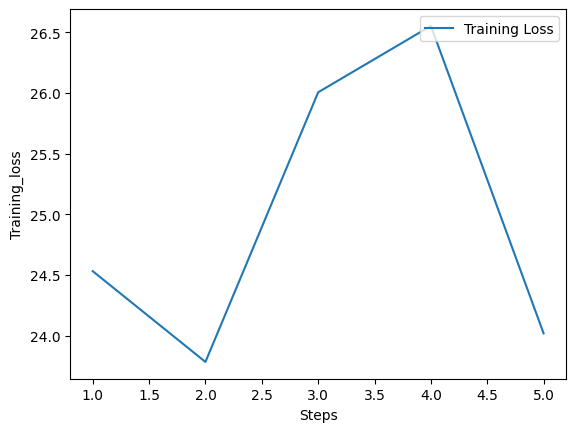

In [ ]:
loss = []
step = []
eval_loss = []
for i in trainer.state.log_history:
#     loss.append(i['loss'])
#     step.append(i['step'])
    if "loss" in i.keys():
        loss.append(i['loss'])
        step.append(i['step'])
    if "eval_loss" in i.keys():
        eval_loss.append(i['eval_loss'])

l = np.array(loss)
s = np.array(step)
# e = np.array(eval_loss)
plt.plot(s,l,label = "Training Loss")
# plt.plot(s,e, label = "Validation Loss")
plt.legend(loc="upper right")
plt.xlabel("Steps")
plt.ylabel("Training_loss")
plt.show()

In [ ]:
trainer.save_model("Model_FlanT5_Debias")

In [ ]:
# m = T5ForConditionalGeneration.from_pretrained("model")
# trainer.compute_loss(m,train_dataset)

In [ ]:
t = tokenizer
m = T5ForConditionalGeneration.from_pretrained("Model_Train_16DEC")

In [ ]:
check = ["must use a baudrate of 115200 to verify if the CAN is active in Channel 1 for a duration of 30 seconds"]
c = t(check,truncation=True,return_tensors="pt")
o = m.generate(**c,max_length=1024)
# o = trainer.predict(**c,max_length=1024)
decode_output = t.batch_decode(o,skip_special_tokens=True)
print(decode_output)
# predicted = nltk.sent_tokenize(decode_output)[0]

In [ ]:
check = ["Initiate the logging activity"]
c = t(check,truncation=True,return_tensors="pt")
o = m.generate(**c,max_length=1024)
# o = trainer.predict(**c,max_length=1024)
decode_output = t.batch_decode(o,skip_special_tokens=True)
print(decode_output)
# predicted = nltk.sent_tokenize(decode_output)[0]

In [ ]:
# !nvidia-smi

In [ ]:
import torch
torch.cuda.is_available()